In [39]:
# Costco Financial Analysis (1997-2007)
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats
import matplotlib.ticker as ticker
%matplotlib inline

In [40]:
# Try to set a pleasant style; fallback to default if not
try:
    plt.style.use('ggplot')
except:
    print("'ggplot' style not available. Using default style.")

In [41]:
# Import Excel file
try:
    df = pd.read_excel('costcoBook.xlsx', index_col=0)
    print("Data imported successfully. Shape:", df.shape)
    print("\nFirst few rows of the data:")
    print(df.head())
    print("\nColumn names (years):")
    print(df.columns)
except FileNotFoundError:
    print("Error: The file 'costcoBook.xlsx' was not found in the current directory.")
    print("Please ensure the file is in the same directory as this Jupyter Notebook.")
except Exception as e:
    print(f"An error occurred while trying to read the file: {e}")
    print("Please check the file format and contents.")

Data imported successfully. Shape: (80, 5)

First few rows of the data:
                                       1997   1998   1999   2000   2001
Warehouses in Operation                 NaN    NaN    NaN    NaN    NaN
Beginning of year (including Mexico)  265.0  274.0  292.0  308.0  331.0
Openings                               17.0   19.0   23.0   27.0   41.0
Closings                               -8.0   -1.0   -7.0   -4.0   -7.0
End of year                           274.0  292.0  308.0  331.0  365.0

Column names (years):
Index([1997, 1998, 1999, 2000, 2001], dtype='int64')


# ROA and ROE Analysis

In [42]:
# # Using average calculations
# # Check if the columns are integers, and if so, convert them to strings
# df.columns = df.columns.astype(str)

# # Create a copy of total assets and total stockholder's equity to avoid modifying the original df
# total_assets = df.loc['Total assets'].copy()
# total_equity = df.loc['Total stockholder’s equity'].copy()

# # Calculate average total assets and average total stockholder's equity for 1998-2001
# for year in range(1998, 2002): 
#     previous_year = str(year - 1)
#     current_year = str(year)
    
#     # Check if previous and current years exist
#     if previous_year in df.columns and current_year in df.columns:
#         # Average total assets and total stockholder's equity
#         total_assets[current_year] = (df.loc['Total assets', previous_year] + df.loc['Total assets', current_year]) / 2
#         total_equity[current_year] = (df.loc['Total stockholder’s equity', previous_year] + df.loc['Total stockholder’s equity', current_year]) / 2
#     else:
#         print(f"Warning: Data for year {previous_year} or {current_year} is missing!")

# # For 1997, use just the total assets and total equity (no data for 1996)
# if '1997' in df.columns:
#     total_assets['1997'] = df.loc['Total assets', '1997']
#     total_equity['1997'] = df.loc['Total stockholder’s equity', '1997']
# else:
#     print("Warning: Data for 1997 is missing!")

# # Calculate ROA and ROE
# df.loc['ROA'] = df.loc['Net Income'] / total_assets * 100
# df.loc['ROE'] = df.loc['Net Income'] / total_equity * 100

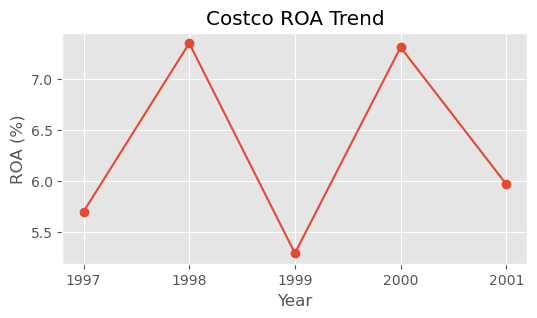

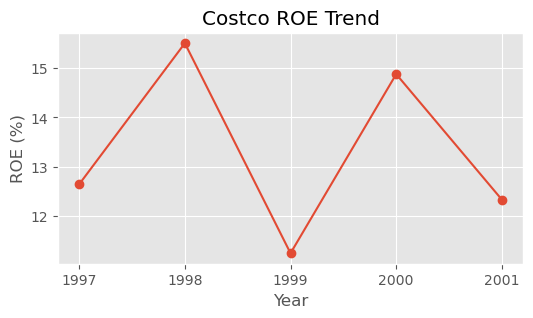

In [50]:
# Function to create and display ROE and ROA line plot (using year end)
def create_line_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(6, 3))
    plt.plot(x, y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()

# Calculate ROA and ROE
df.loc['ROA'] = df.loc['Net Income'] / df.loc['Total assets']*100
df.loc['ROE'] = df.loc['Net Income'] / df.loc['Total stockholder’s equity']*100

# Create and display ROA and ROE trend plots
create_line_plot(df.columns.astype(int).astype(str), df.loc['ROA'], 'Costco ROA Trend', 'Year', 'ROA (%)')
create_line_plot(df.columns.astype(int).astype(str), df.loc['ROE'], 'Costco ROE Trend', 'Year', 'ROE (%)')

**ROA and ROE Discussion:**

*Note: calculations are based on average total assets and average total stockholder's equity*

"Net income in the fourth quarter of fiscal 1999 was impacted by a 50 million USD (30 million USD after-tax, or 0.06 per diluted share) provision for impaired assets and warehouse closing costs primarily related to the Company's planned increase in the number of warehouse relocations to larger and better-located facilities. Before the impact of this charge, net income for the fourth quarter of fiscal 1999 would have been 183.2 million USD, or 0.39 per diluted share and would have resulted in a 9% fourth quarter earnings increase."

https://investor.costco.com/news/news-details/2000/Costco-Wholesale-Corporation-Releases-Fourth-Quarter-and-Fiscal-Year-2000-Results-of-Operations-10-12-2000/default.aspx

In [51]:
# Time Series Analysis: predict future values using linear regression - may not be useful
def predict_future(data, years_to_predict=5):
    x = np.arange(len(data))
    slope, intercept, _, _, _ = stats.linregress(x, data)
    future_x = np.arange(len(data), len(data) + years_to_predict)
    future_y = slope * future_x + intercept
    return future_y

In [52]:
# Predict future values for ROA and ROE
last_year = int(df.columns[-1])
future_years = range(last_year + 1, last_year + 6)  #5 years into the future
future_roa = predict_future(df.loc['ROA'])
future_roe = predict_future(df.loc['ROE'])

In [53]:
# Create new df w/ both historical (1997-2001) and predicted (2002-2006)
extended_df = df.copy()
for i, year in enumerate(future_years):
    extended_df[str(year)] = pd.Series({
        'ROA': future_roa[i],
        'ROE': future_roe[i]
    })
extended_df.loc[['ROA', 'ROE']]

,1997,1998,1999,2000,2001,2002,2003,2004,2005,2006
ROA,5.697263,7.348454,5.289806,7.308367,5.966430,6.471538,6.521363,6.571187,6.621012,6.670837
ROE,12.641221,15.509699,11.239741,14.881093,12.328638,12.943947,12.818569,12.693192,12.567815,12.442438


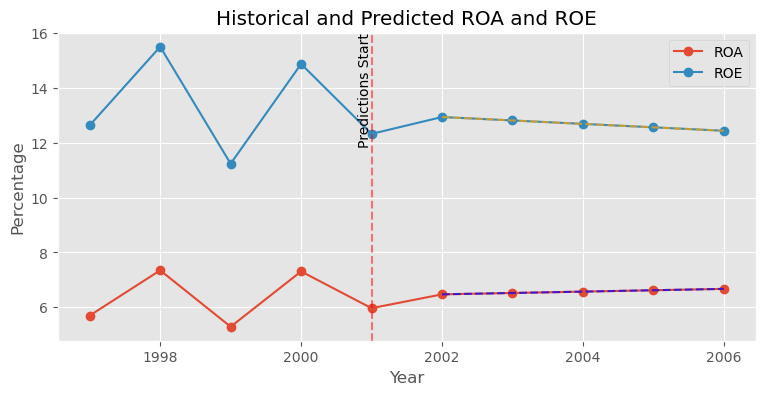

In [54]:
# Plot ROA and ROE
plt.figure(figsize=(9, 4))
plt.plot(extended_df.columns.astype(int), extended_df.loc['ROA'], label='ROA', marker='o')
plt.plot(extended_df.columns.astype(int), extended_df.loc['ROE'], label='ROE', marker='o')

# Highlight predicted values
plt.plot(future_years, future_roa, linestyle='--', color='blue', alpha=0.7)
plt.plot(future_years, future_roe, linestyle='--', color='orange', alpha=0.7)
plt.title('Historical and Predicted ROA and ROE')
plt.xlabel('Year')
plt.ylabel('Percentage')
plt.legend()
plt.grid(True)

# Add vertical line to separate historical and predicted
plt.axvline(x=last_year, color='red', linestyle='--', alpha=0.5)
plt.text(last_year, plt.ylim()[1], 'Predictions Start', rotation=90, va='top', ha='right')

plt.show()

# DuPont Analysis

*Note: used 'Total revenues' instead of 'Net sales' to include membership fees for Profit Margin and Asset Turnover*

In [22]:
# Calculate Profit Margin, Asset Turnover, and Financial leverage
df.loc['Profit Margin'] = df.loc['Net Income'] / df.loc['Total revenues']*100
df.loc['Asset Turnover'] = df.loc['Total revenues'] / df.loc['Total assets']
df.loc['Financial Leverage'] = df.loc['Total assets'] / df.loc['Total stockholder’s equity']

In [23]:
# Calculate ROE using DuPont Analysis
df.loc['ROE (DuPont)'] = df.loc['Profit Margin'] * df.loc['Asset Turnover'] * df.loc['Financial Leverage']

In [24]:
# Create a new DataFrame for the results
results_df = df.loc[['Profit Margin', 'Asset Turnover', 'Financial Leverage', 'ROE (DuPont)']]
print(results_df)

                         1997       1998       1999       2000       2001
Profit Margin        1.426351   1.895344   1.445950   1.961821   1.730034
Asset Turnover       3.994293   3.877108   3.658361   3.725298   3.448735
Financial Leverage   2.218824   2.110607   2.124793   2.036172   2.066334
ROE (DuPont)        12.641221  15.509699  11.239741  14.881093  12.328638


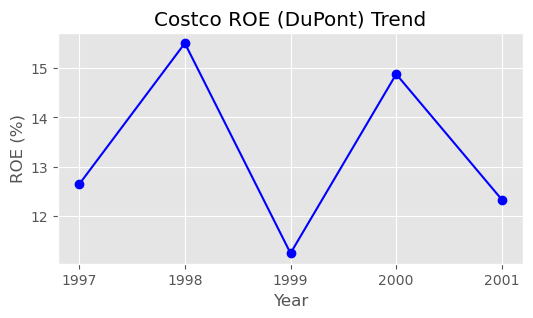

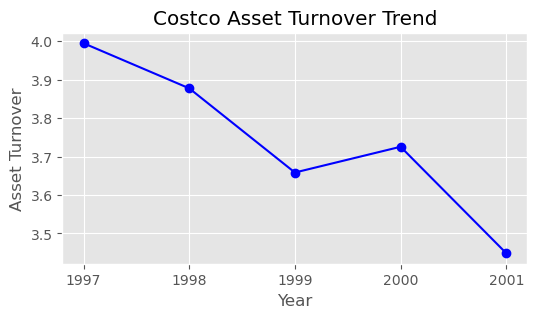

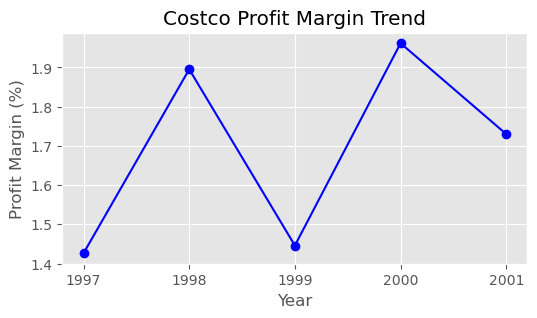

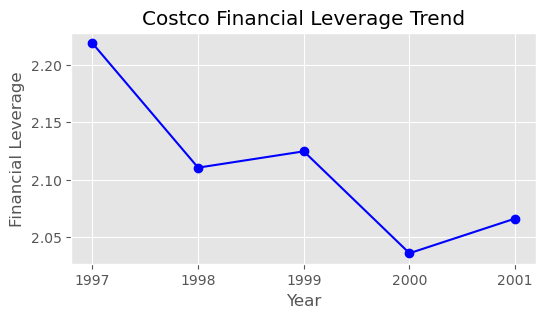

In [25]:
# Create plots
def create_single_plot(x, y, title, xlabel, ylabel, label):
    plt.figure(figsize=(6, 3))
    plt.plot(x, y, marker='o', linestyle='-', color='b', label=label)
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    # plt.legend()
    plt.grid(True)
    plt.show()

# Get the year columns (assuming they are in the DataFrame as integers)
years = results_df.columns.astype(int).astype(str)

# Visualize ROE (DuPont)
create_single_plot(years, 
                   results_df.loc['ROE (DuPont)'], 
                   'Costco ROE (DuPont) Trend', 
                   'Year', 
                   'ROE (%)', 
                   'ROE (w/ Membership)')

# Visualize Asset Turnover
create_single_plot(years, 
                   results_df.loc['Asset Turnover'], 
                   'Costco Asset Turnover Trend', 
                   'Year', 
                   'Asset Turnover', 
                   'Asset Turnover')

# Visualize Profit Margin
create_single_plot(years, 
                   results_df.loc['Profit Margin'], 
                   'Costco Profit Margin Trend', 
                   'Year', 
                   'Profit Margin (%)', 
                   'Profit Margin')

# Visualize Profit Margin
create_single_plot(years, 
                   results_df.loc['Financial Leverage'], 
                   'Costco Financial Leverage Trend', 
                   'Year', 
                   'Financial Leverage', 
                   'Financial Leverage')

**DuPont Discussion:**

Overall, while Costco demonstrated reasonable profit margins, the declining asset turnover ratio and fluctuating ROE may indicate operational challenges that need to be addressed. The trend in financial leverage shows a move towards a more conservative financial structure, which can be beneficial for long-term sustainability.

1. Costco ROE (DuPont) Observations: The Return on Equity (ROE) fluctuated during this period, peaking in 1998 above 15% before dropping below 12% in 1999. Thereafter, ROE showed some recovery in 2000 and slightly declined again in 2001.
- The variability in ROE suggests that Costco faced challenges in maintaining consistent profitability relative to shareholders’ equity.
- The dip in 1999 indicates operational challenges due to warehouse relocations. 

2. Costco Asset Turnover Observations: Asset turnover declined steadily from about 4.0 in 1997 to approximately 3.65 in 2001.
- A decreasing asset turnover ratio suggests that Costco became less efficient at generating revenue from its assets over the years.
- This decline could result from increased asset investment that did not yield proportional revenue growth, indicating potential overcapacity or underperformance in sales relative to asset base.

3. Costco Profit Margin Observations: Profit margins experienced fluctuations.
- The instability in profit margins suggests ineffective cost management and/or pricing strategies. The peaks indicate periods of stronger performance, likely linked to favorable market conditions or effective operational adjustments.

4. Costco Financial Leverage Observations: Financial leverage showed a downward trend, decreasing from about 2.2 in 1997 to below 2.05 in 2000.
- A decreasing financial leverage ratio suggests that Costco may have been reducing its reliance on debt to finance assets, potentially indicating a shift towards a more conservative financial strategy. This could imply a stronger balance sheet and reduced financial risk over time, but it may also suggest less aggressive expansion.

# Third-level Analysis

In [205]:
# Calculate Year-over-Year Growth Rates
print("\nYear-over-Year Growth Rates:")
for metric in ['Total revenues', 'Net Income', 'Total assets', 'Total stockholder’s equity']:
    growth_rates = df.loc[metric].pct_change() * 100
    df.loc[f'{metric} YoY Growth'] = growth_rates.round(2)
    print(f"\n{metric} YoY Growth:")
    print(growth_rates.round(2))


Year-over-Year Growth Rates:

Total revenues YoY Growth:
1997      NaN
1998    10.95
1999    13.13
2000    17.15
2001     8.19
Name: Total revenues, dtype: float64

Net Income YoY Growth:
1997      NaN
1998    47.44
1999   -13.70
2000    58.94
2001    -4.60
Name: Net Income, dtype: float64

Total assets YoY Growth:
1997      NaN
1998    14.31
1999    19.89
2000    15.04
2001    16.86
Name: Total assets, dtype: float64

Total stockholder’s equity YoY Growth:
1997      NaN
1998    20.17
1999    19.09
2000    20.05
2001    15.16
Name: Total stockholder’s equity, dtype: float64


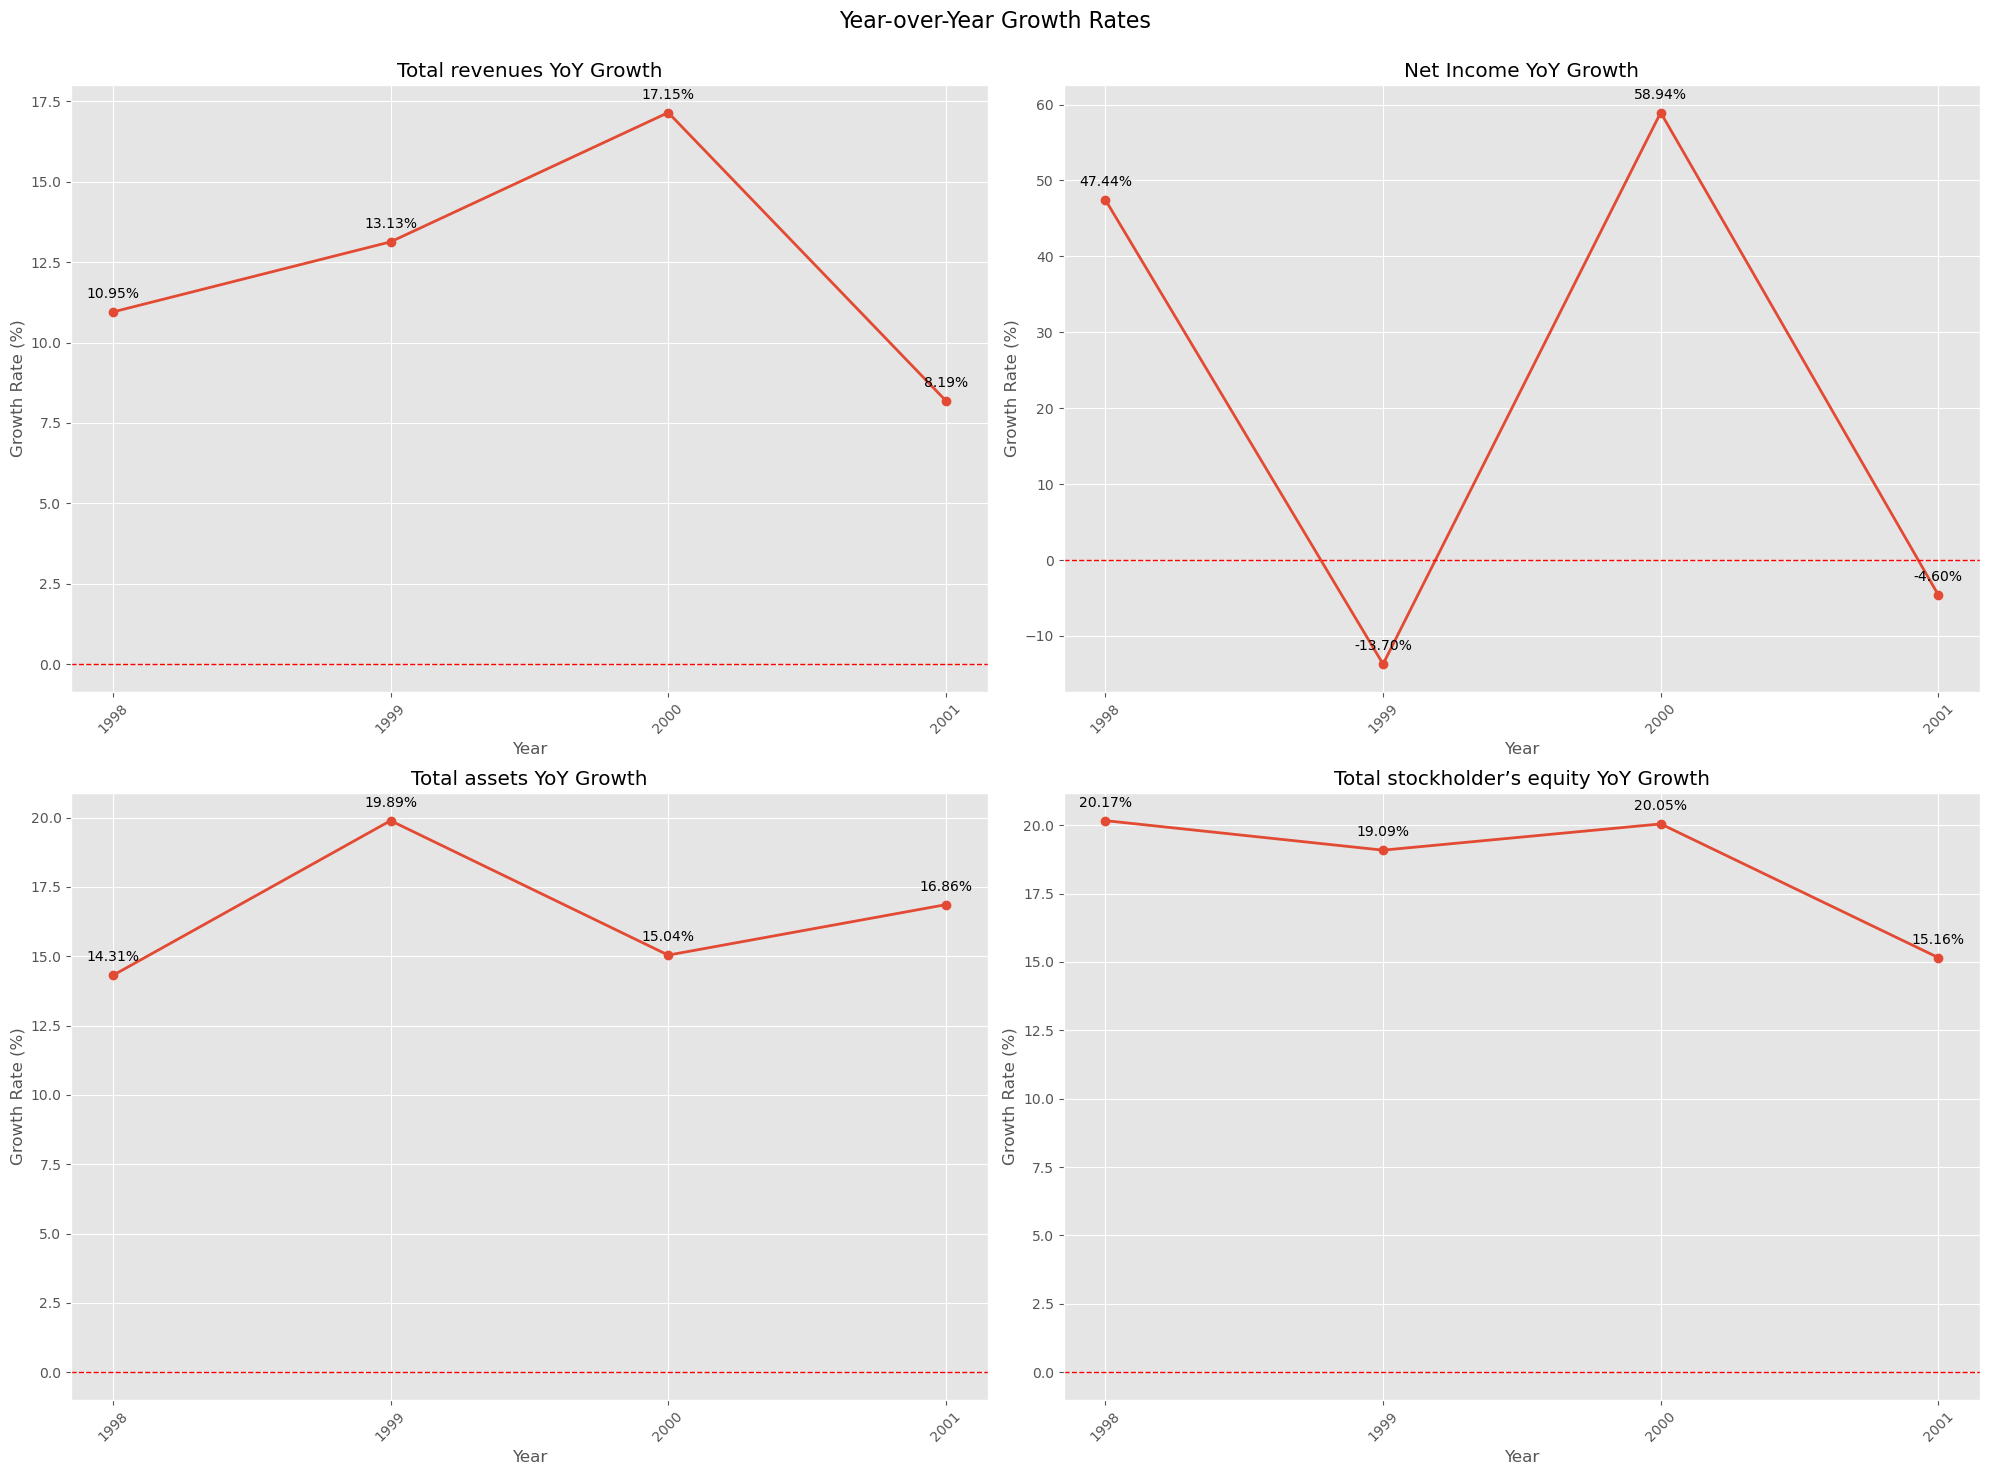

In [206]:
# Create growth rate plots
def create_individual_yoy_growth_plots(df):
    metrics = ['Total revenues YoY Growth', 'Net Income YoY Growth', 
               'Total assets YoY Growth', 'Total stockholder’s equity YoY Growth']
    
    fig, axs = plt.subplots(2, 2, figsize=(20, 15))
    fig.suptitle('Year-over-Year Growth Rates', fontsize=16)
    
    for i, metric in enumerate(metrics):
        row = i // 2
        col = i % 2
        
        # Convert years to int
        years = df.columns[1:].astype(int)
        
        axs[row, col].plot(years, df.loc[metric][1:], marker='o', linestyle='-', linewidth=2)
        axs[row, col].set_title(metric)
        axs[row, col].set_xlabel('Year')
        axs[row, col].set_ylabel('Growth Rate (%)')
        axs[row, col].grid(True)
        
        # Format x-axis ticks as int
        axs[row, col].xaxis.set_major_locator(ticker.MaxNLocator(integer=True))
        axs[row, col].tick_params(axis='x', rotation=45)
        
        # Add horizontal line at y=0 for reference
        axs[row, col].axhline(y=0, color='r', linestyle='--', linewidth=1)
        
        # Annotate each point w/ value
        for x, y in zip(years, df.loc[metric][1:]):
            axs[row, col].annotate(f'{y:.2f}%', (x, y), textcoords="offset points", xytext=(0,10), ha='center')

    plt.tight_layout()
    plt.subplots_adjust(top=0.93)  # Adjust top header space
    plt.show()

create_individual_yoy_growth_plots(df)

**YoY Growth Rates Discussion**
- Revenue Growth: Costco exhibited strong revenue growth overall, especially in 2000. However, the decline in growth rates in 2001 signals a potential slowdown.
- Net Income Volatility: The net income growth reflects volatility, with significant fluctuations in profitability indicating challenges in cost management or market dynamics.
- Asset: Strong growth in total assets, peaking at 19.89% in 1999, reflects Costco’s expansion, likely due to new store openings or increased inventory. Generally, the growth rates remain positive, suggesting ongoing investment in assets to support growth strategies.
- Equity Growth: Statble growth rates in stockholder’s equity indicate that Costco has been able to increase its equity base, which is a positive sign for investors, reflecting retention of earnings and possibly capital raises. The decline in stockholder’s equity in 2001 highlights a key challenge for Costco during that year, possibly linked to reduced profitability or higher payouts, despite the continued asset growth. 

In [207]:
# trend number of members (business + gold star)
df.loc['Number of Members'] = (df.loc['Business (primary cardholders)'] + df.loc['Gold Star'])/1000

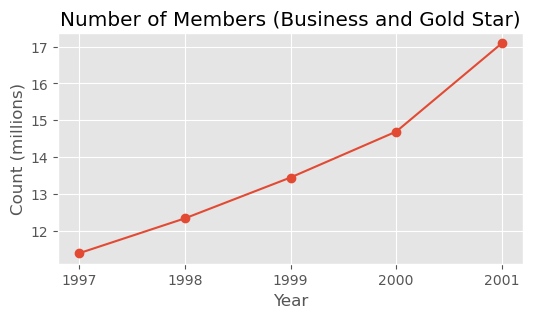

In [208]:
def create_line_plot(x, y, title, xlabel, ylabel):
    plt.figure(figsize=(6, 3))
    plt.plot(x, y, marker='o')
    plt.title(title)
    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.grid(True)
    plt.show()
    
create_line_plot(df.columns.astype(int).astype(str), df.loc['Number of Members'], 'Number of Members (Business and Gold Star)', 'Year', 'Count (millions)')

In [209]:
# Analyze membership fees against total revenue
if 'Membership fees and other' in df.index:
    df.loc['Membership Fees % of Revenue'] = df.loc['Membership fees and other'] / df.loc['Total revenues'] * 100
    print("\nMembership Fees as % of Revenue:")
    print(df.loc['Membership Fees % of Revenue'])


Membership Fees as % of Revenue:
1997    1.782939
1998    1.812938
1999    1.748252
2000    1.688223
2001    1.896715
Name: Membership Fees % of Revenue, dtype: float64


**Discussion:**
The percentage of membership fees as a portion of revenue shows a slight fluctuation over the five years, with an overall increase from 1.78% in 1997 to 1.90% in 2001. The increase in membership fees as a percentage of revenue in the latter part of the period (2000-2001) may suggest improved operational strategies or market positioning. Overall, while there were fluctuations, Costco managed to end the five-year period with a higher proportion of revenue coming from membership fees compared to 1997.

In [210]:
# Analyze debt management: Total liabilities/Total SE
if 'Total liabilities' in df.index:
    df.loc['Debt to Equity Ratio'] = (df.loc['Total liabilities']) / df.loc['Total stockholder’s equity']
    print("\nDebt to Equity Ratio:")
    print(df.loc['Debt to Equity Ratio'])


Debt to Equity Ratio:
1997    1.183095
1998    1.075045
1999    1.090598
2000    1.010500
2001    1.042613
Name: Debt to Equity Ratio, dtype: float64


**Discussion**:
The debt to equity ratio shows a declining trend from 1997 to 2000, reaching a low of 1.01 in 2000, followed by a slight increase in 2001 to 1.04. This could indicate a trend towards reduced leverage and a stronger equity base. The small increase in 2001 suggests a potential strategic decision to take on additional debt, but it still maintains a favorable debt position. This conservative approach to leverage likely contributed to financial stability during this period, making Costco well-positioned for future growth.

In [211]:
# Analyze operational efficiency ratio: Total operating expenses / Sales (including membership)
if 'Total operating expenses' in df.index:
    df.loc['Operational Efficiency Ratio'] = (df.loc['Total operating expenses']) / df.loc['Total revenues']*100
    print("\nOperational Efficiency Ratio:")
    print(df.loc['Operational Efficiency Ratio'])


Operational Efficiency Ratio:
1997    97.343879
1998    96.757314
1999    96.867716
2000    96.775899
2001    97.149180
Name: Operational Efficiency Ratio, dtype: float64


**Discussion**:
 In the retail sector, operational efficiency ratios typically range from 90% to 95%. Overall, Costco's operational efficiency ratio remained relatively stable, with a slight improvement from 1997 to 1998, followed by maintenance in the following years until a decline in efficiency in 2001, suggesting potential challenges in controlling operational costs.

In [212]:
# Analyze Operating Margin: Operating income / Sales (including membership)
if 'Operating income' in df.index:
    df.loc['Operating Margin'] = df.loc['Operating income'] / df.loc['Total revenues'] * 100
    print("\nOperating Margin:")
    print(df.loc['Operating Margin'])


Operating Margin:
1997    2.656121
1998    3.242686
1999    3.132284
2000    3.224101
2001    2.850820
Name: Operating Margin, dtype: float64


**Discussion**:
 In the retail industry, operating margins generally range from 3% to 6%. The operating margins for Costco ranged from 2.66% to 3.24%, which are within the typical range for a retail warehouse club. However, the decline in 2001 could indicate emerging challenges that might need to be addressed, such as cost management or competitive pressures affecting profitability.

In [213]:
# Analyze Tax Burden: Net Income / Income continuing ops before taxes
if 'Net Income' in df.index:
    df.loc['Tax Burden'] = df.loc['Net Income'] / df.loc['Income continuing ops before taxes'] * 100
    print("\nTax Burden:")
    print(df.loc['Tax Burden'])


Tax Burden:
1997    60.000000
1998    60.052219
1999    46.216531
2000    59.980989
2001    60.019940
Name: Tax Burden, dtype: float64


**Discussion**: 
The tax burden values for Costco show considerable variation, particularly with the drop in 1999. The levels of around 60% during most years suggest that Costco’s tax strategy or earnings structure may have been particularly unique compared to typical corporate tax burdens.

Possible factors: 
- Different states have varying tax rates, and Costco operates in many regions. High state or local taxes could contribute to a higher overall tax burden.
- Profit Margins: Retailers like Costco operate on thin margins. If a substantial portion of revenue is from low-margin sales, the effective tax rate can appear high relative to profits.
- Membership Fees: Membership fees are often subject to different tax treatments, potentially impacting overall tax liabilities.
- Foreign tax implications for international operations.